# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
import matplotlib.pyplot as plt
import wetting

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Run surface tension analysis code
Run this to execute all relevant cells to obtain surface tension from AFM data and simulations. Make sure the simulation data paths are correct.

In [15]:
%%javascript
Jupyter.notebook.execute_cells([8,10,12])

<IPython.core.display.Javascript object>

## Surface Evolver simulation data files

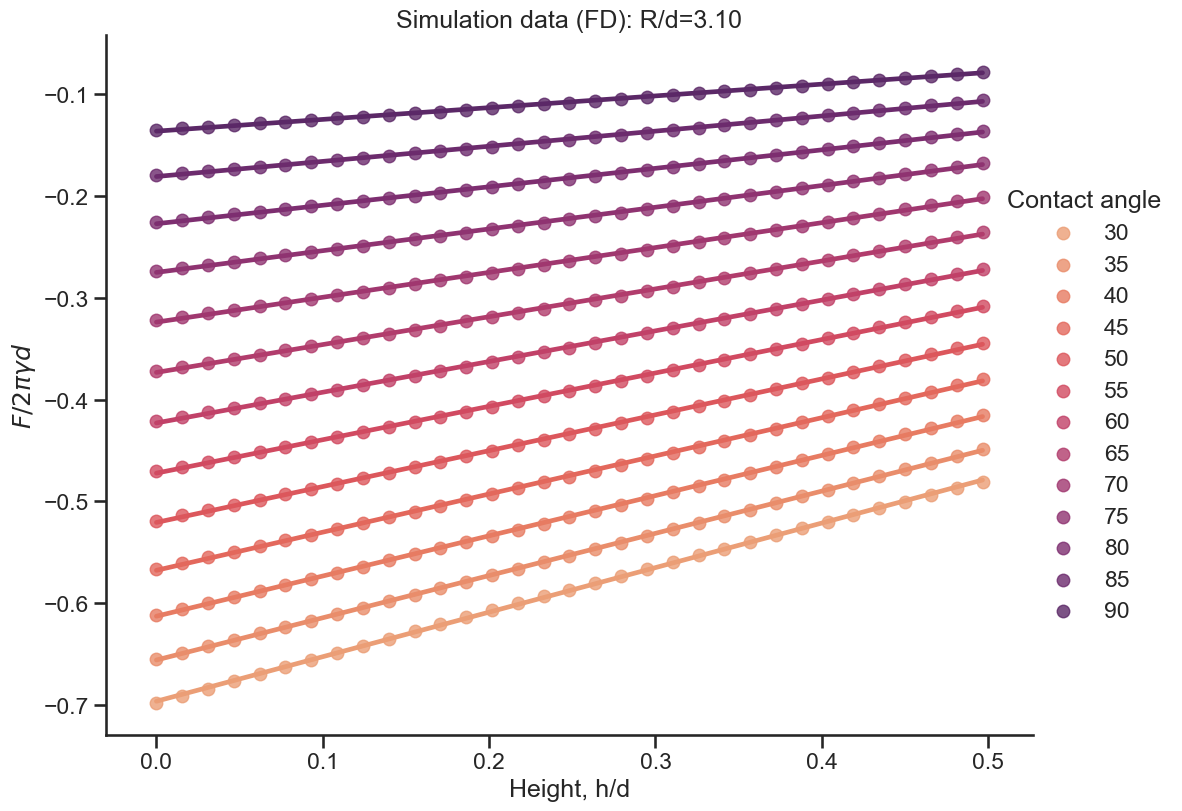

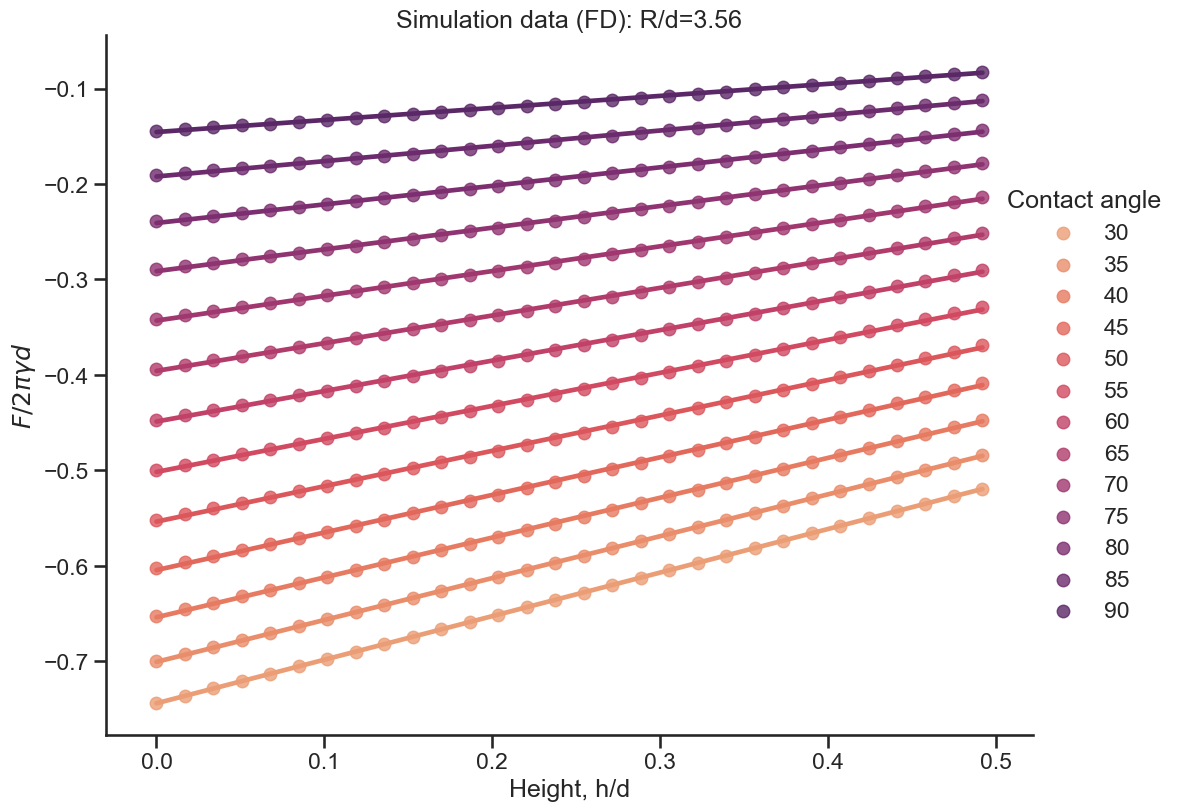

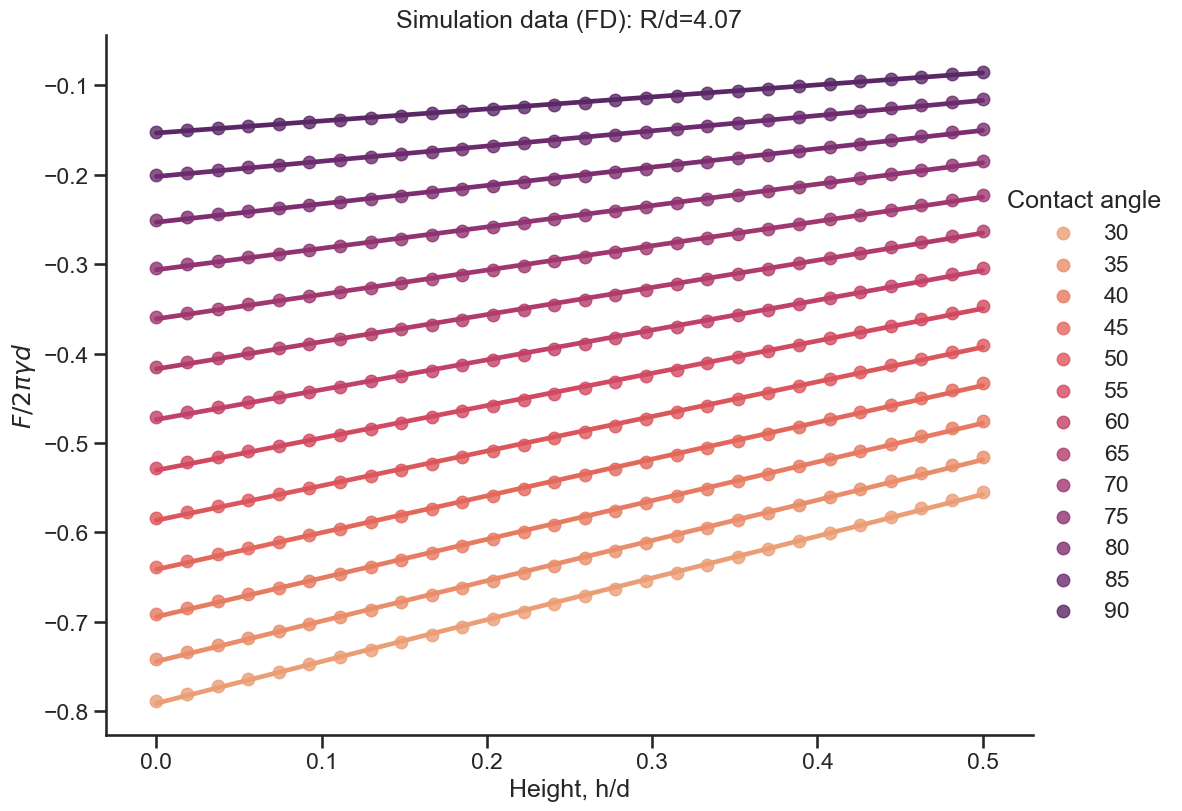

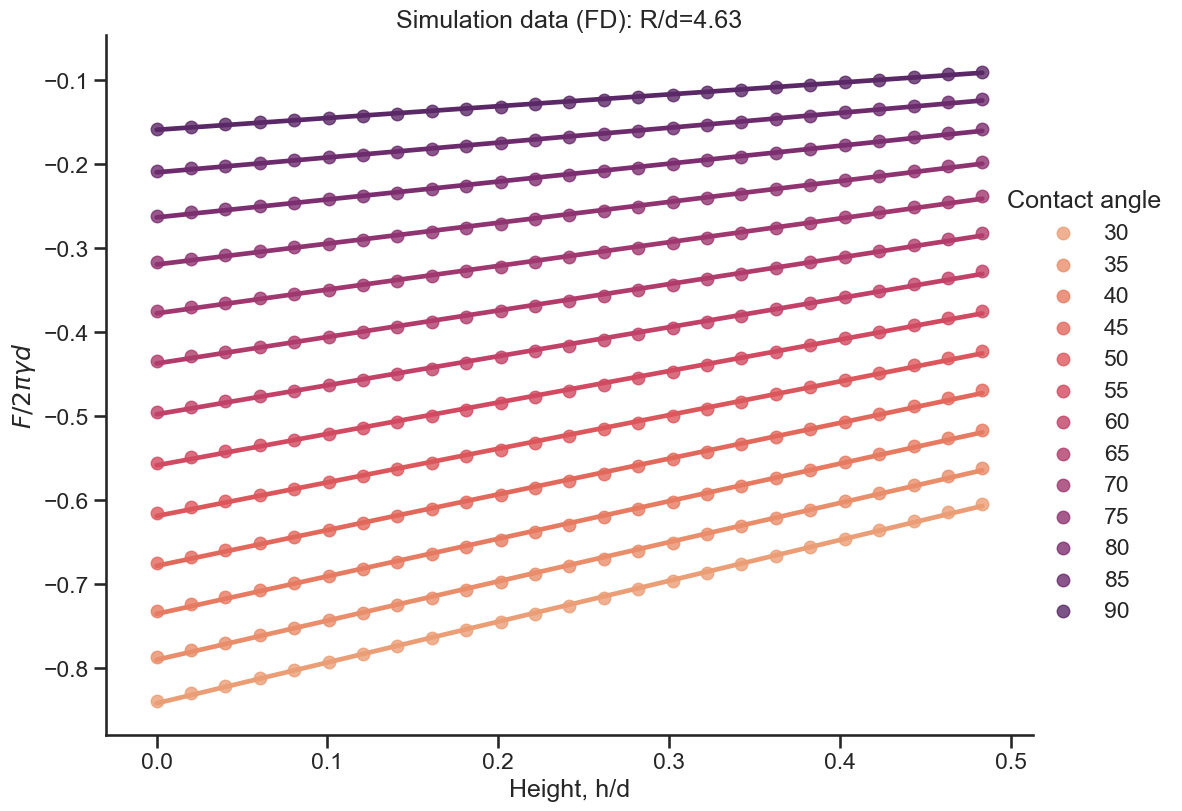

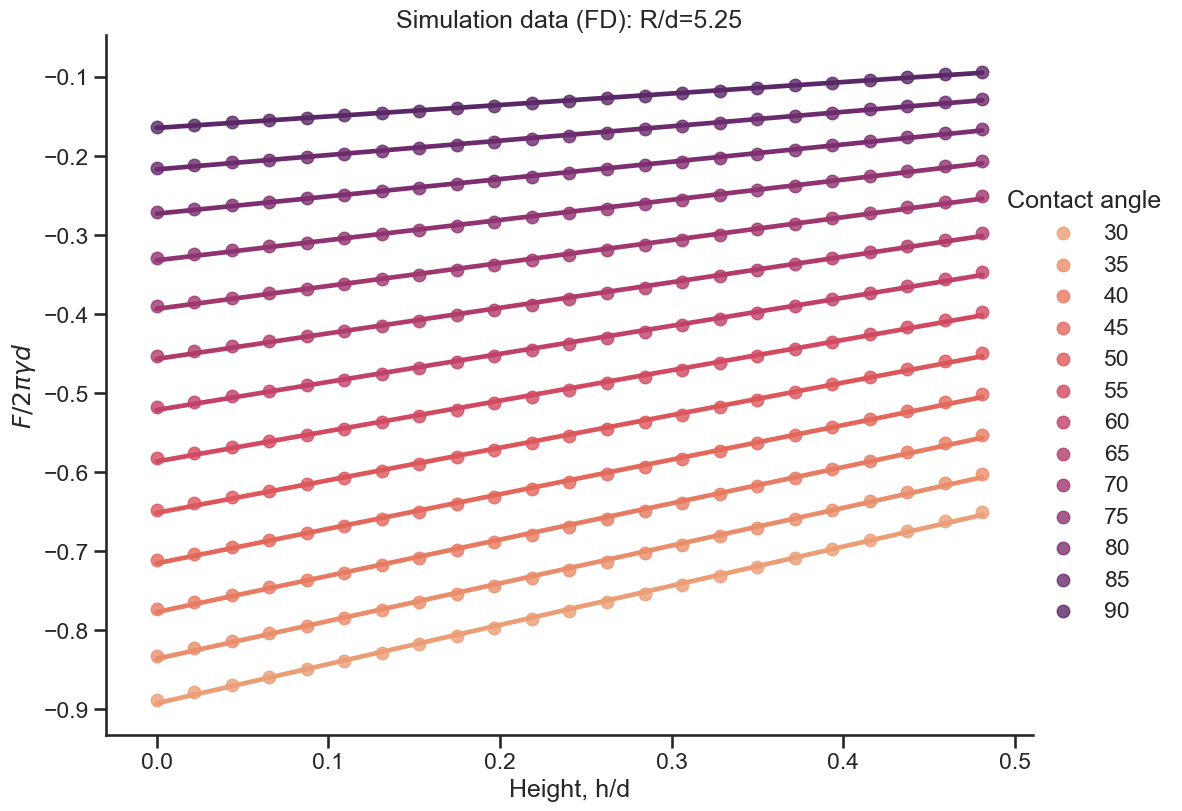

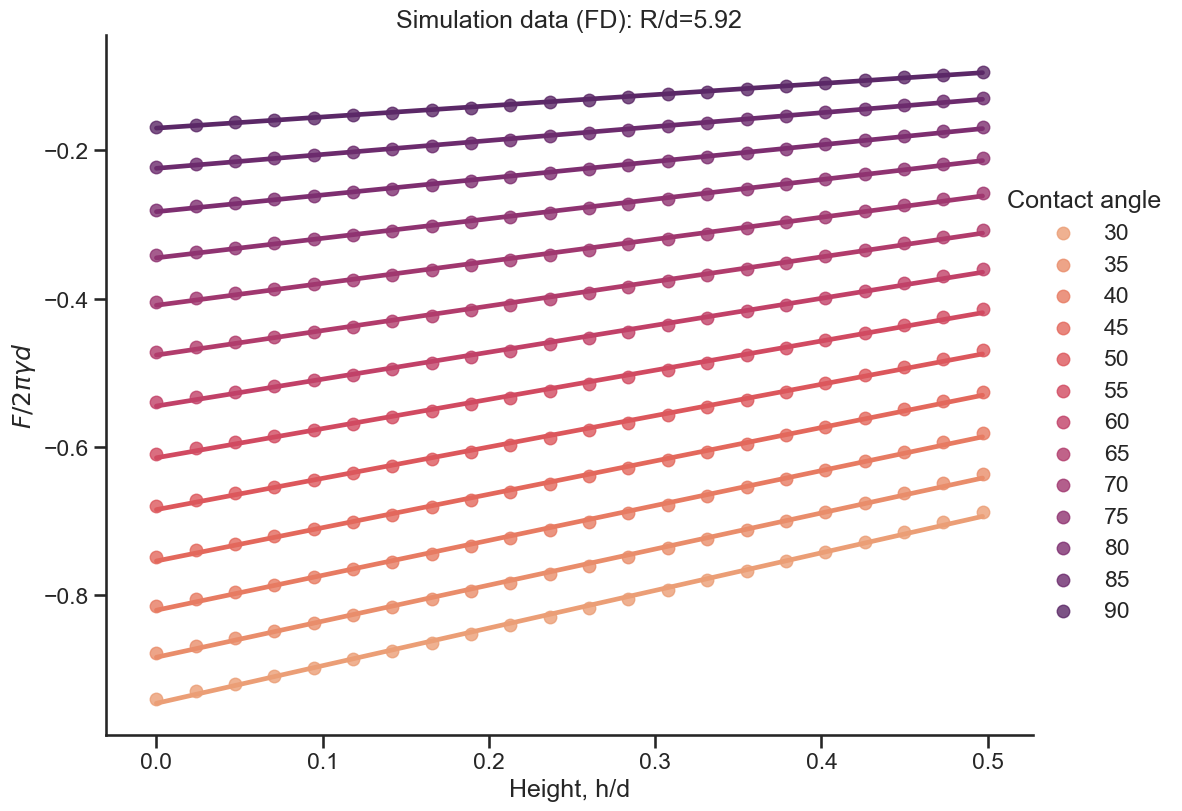

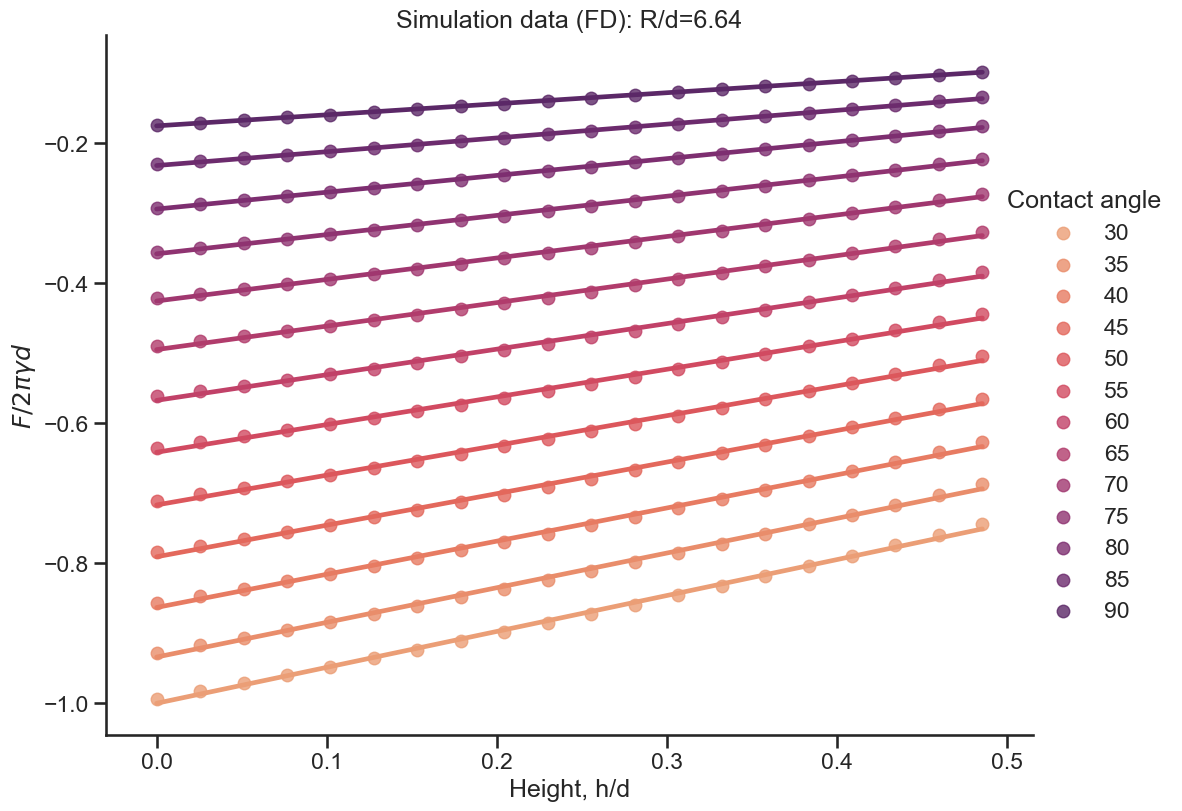

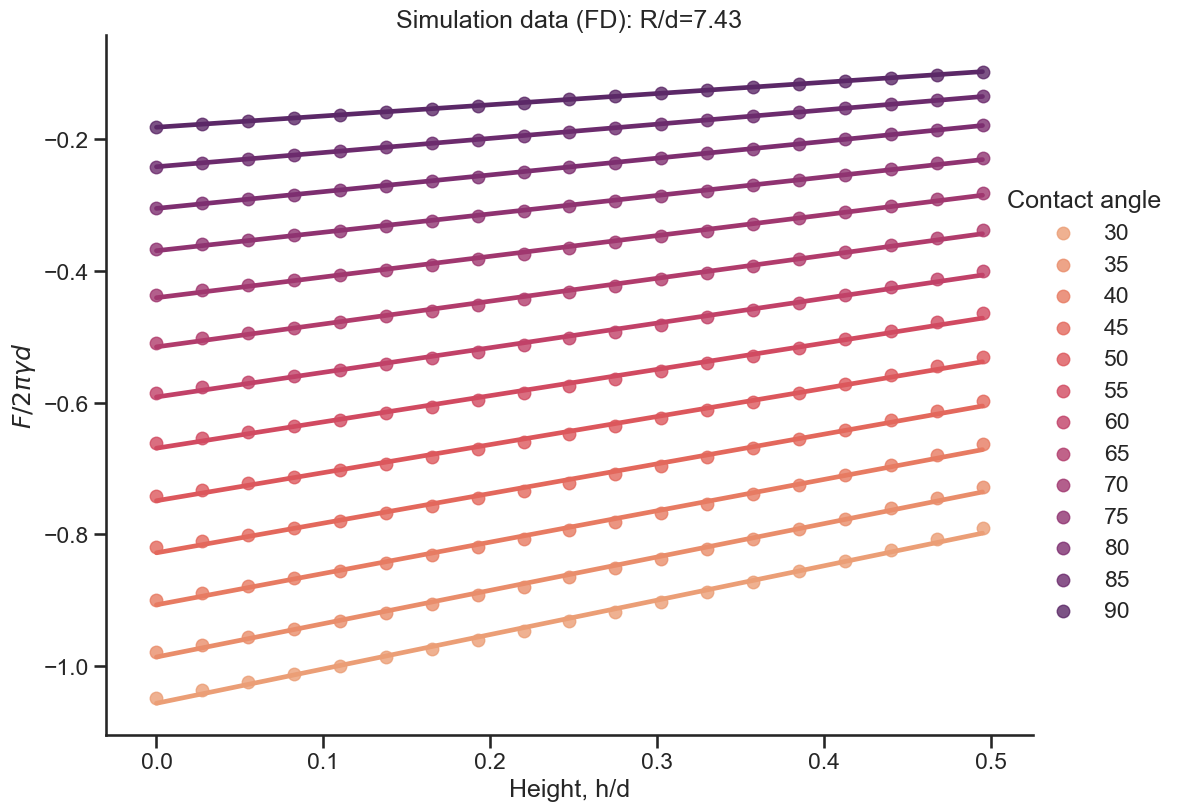

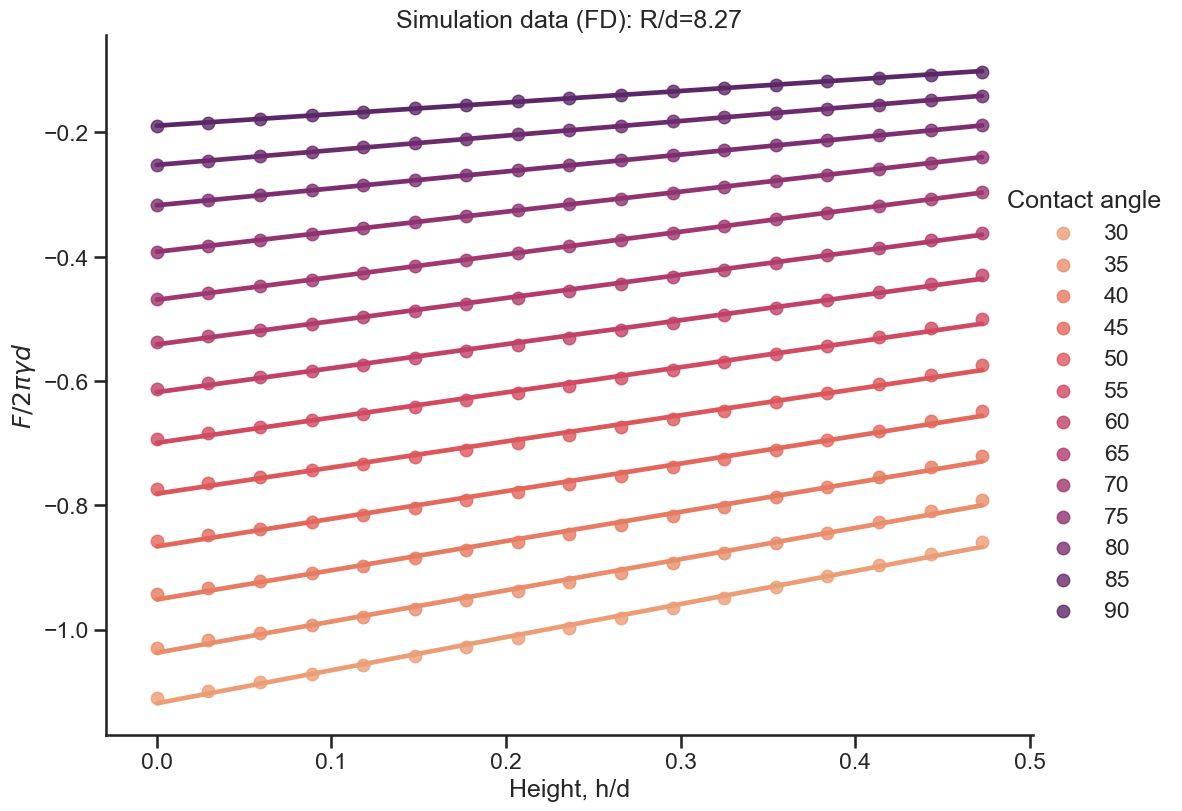

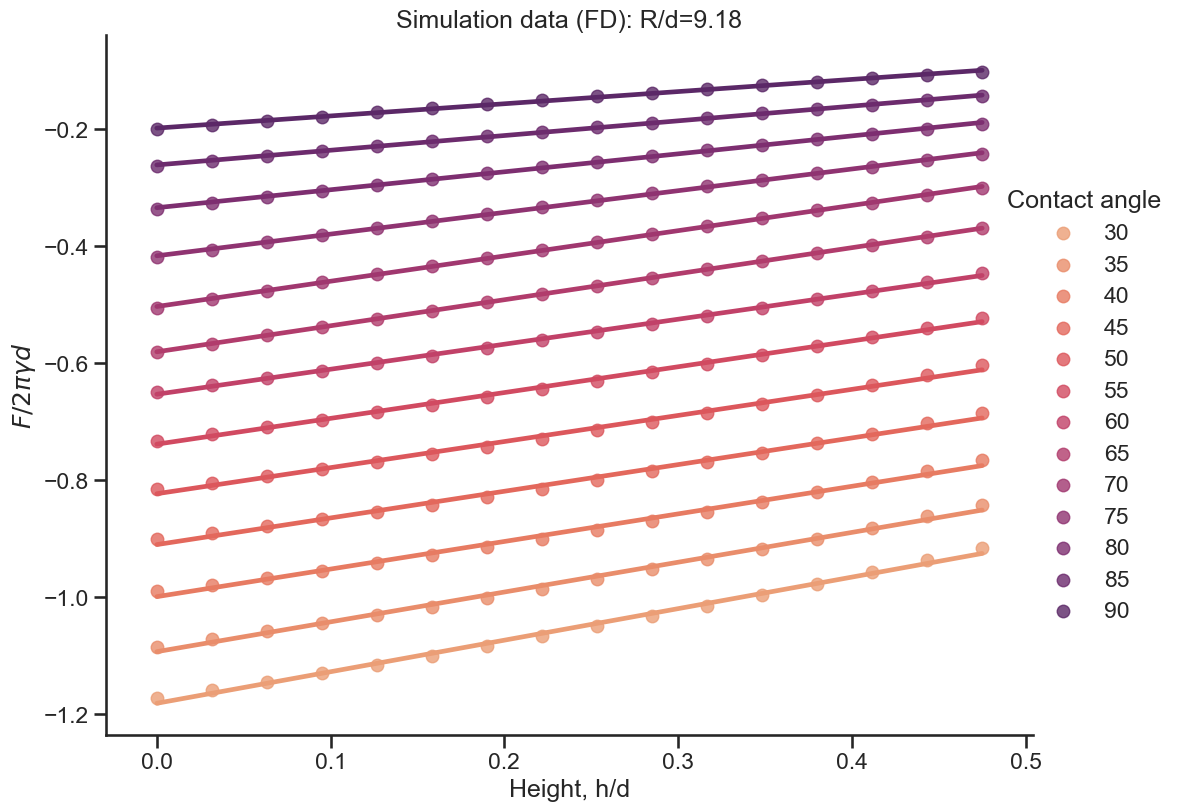

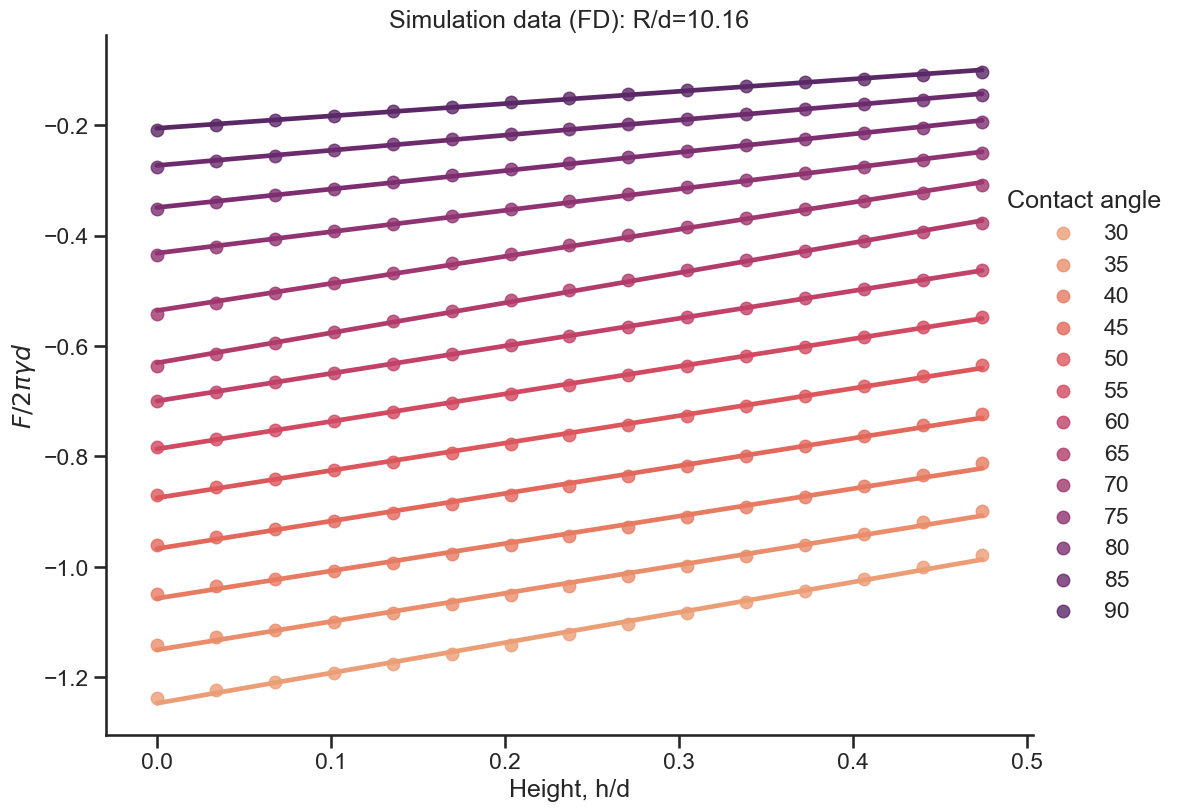

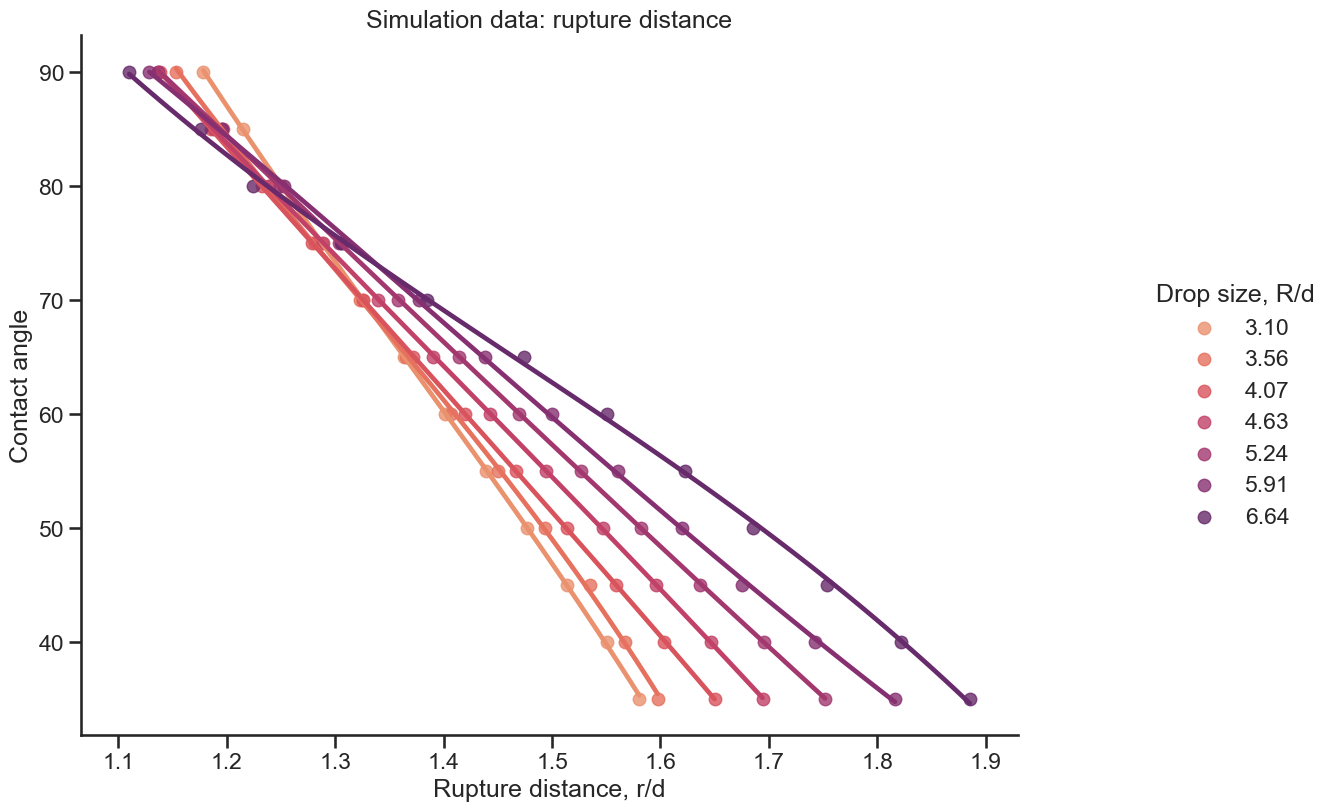

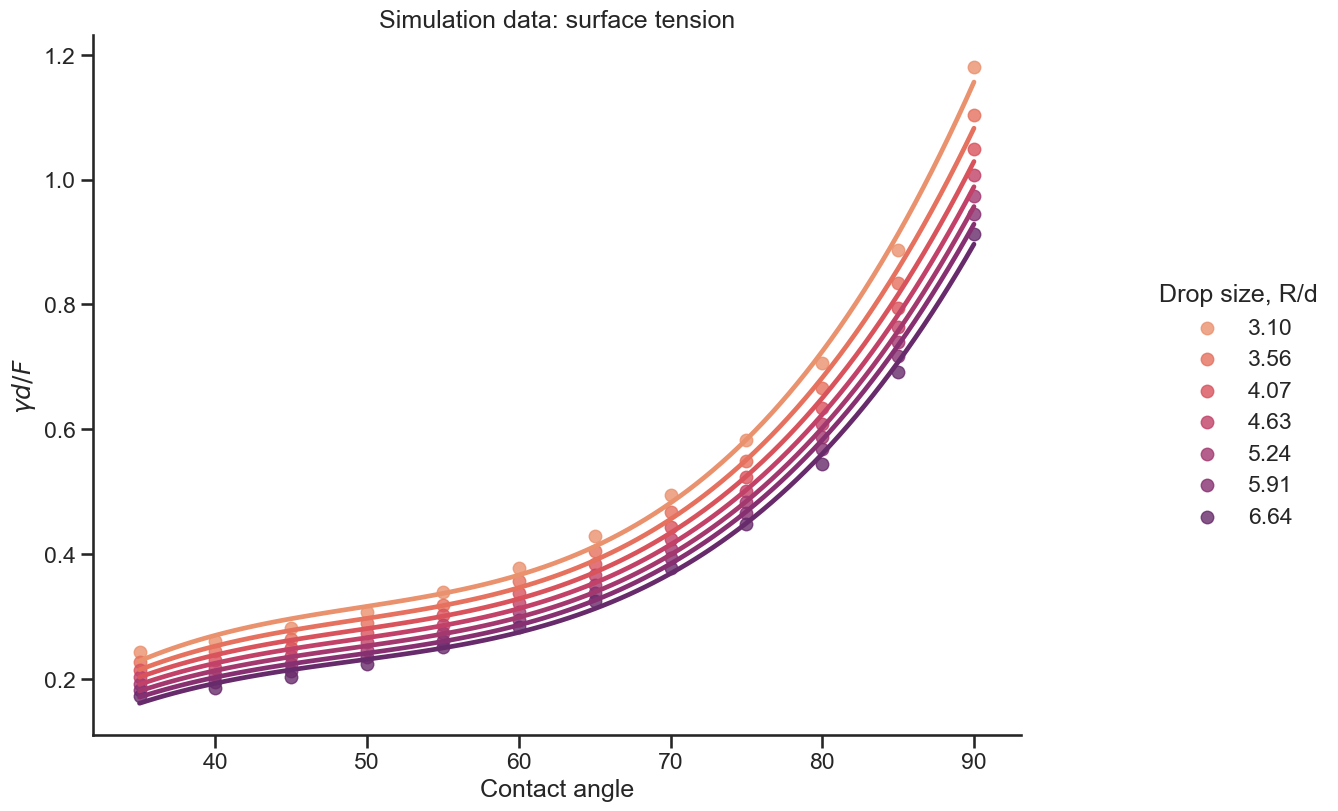

In [23]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = wetting.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [2]:
img_file_path, _ = QFileDialog.getOpenFileName(caption='Select JPK/QI data') #JPK image data (*.jpk or *.jpk-qi-data)
#file_path = 'data/qi-area2-data-2021.07.10-19.22.05.499.jpk-qi-data'
fd_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK force data') #JPK force data (*.jpk-force)
#fd_file_paths = ['../20210420 silicone oil tip-pdms brush/force-save-area4-f2_s10-2021.04.20-17.57.38.004.jpk-force']
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder

#make output directory
if output_dir == '':
    output_dir = os.path.dirname(img_file_path) + '/analysis'
file_name = os.path.basename(img_file_path)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
output_path = f'{output_dir}/{file_name}_results_{timestamp}'
os.makedirs(output_path, exist_ok=True)

print('Image data:\n', img_file_path, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_path)

Image data:
 E:/Work/AFM/codes/data/save-area3-2021.11.25-20.41.54.520.jpk 
Force data:
 [] 
Output folder:
 E:/Work/AFM/codes/data/analysis/save-area3-2021.11.25-20.41.54.520.jpk_results_220412-160425


## Get liquid drop properties

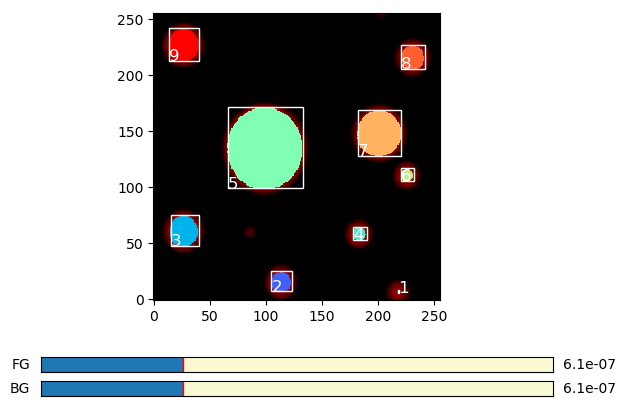

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      2   0.000009        0.000004  8.160494e-07    8.371778e-07   
1      3   0.000010        0.000004  1.037513e-06    1.055354e-06   
2      4   0.000001        0.000001  1.053720e-06    7.263712e-07   
3      5   0.000018        0.000009  2.168352e-06    2.210141e-06   
4      6   0.000001        0.000001  1.023815e-06    7.143157e-07   
5      7   0.000012        0.000006  1.386880e-06    1.396939e-06   
6      8   0.000008        0.000004  9.153765e-07    9.208640e-07   
7      9   0.000009        0.000004  1.080416e-06    1.089086e-06   

         Volume    Volume raw  Drop contact angle Max Adhesion             s  \
0  1.912493e-17  7.398135e-18           24.033032         None  1.658964e-06   
1  3.106077e-17  1.901234e-17           26.983073         None  1.950030e-06   
2  3.134323e-18  2.971394e-18           80.973928         None  9.078589e-07   
3  2.622521e-16  2.344367e-16           28.036549         None  3.970789e-06   
4  2.442560e-18  2.435764e-18           86.866579         None  8.354470e-07   
5  6.842696e-17  5.442816e-17           28.075142         None  2.537345e-06   
6  2.018701e-17  1.114363e-17           27.723541         None  1.689122e-06   
7  3.279228e-17  2.164326e-17           27.889157         None  1.985612e-06   

        R/d                                           AFM file  
0  4.697971  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
1  4.168012  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
2  1.171389  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
3  4.005338  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
4  1.056240  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
5  3.999606  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
6  4.052406  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
7  4.027373  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...

In [30]:
plt.close('all')
#drop analysis of AFM data
drop_df, fig_list = wetting.get_drop_prop(img_file_path, output_path, fd_file_paths,
                                          force_cycle='approach',level_order=2)
for fig in fig_list:
    display(fig)
display(drop_df)

## Droplet surface tension calculation

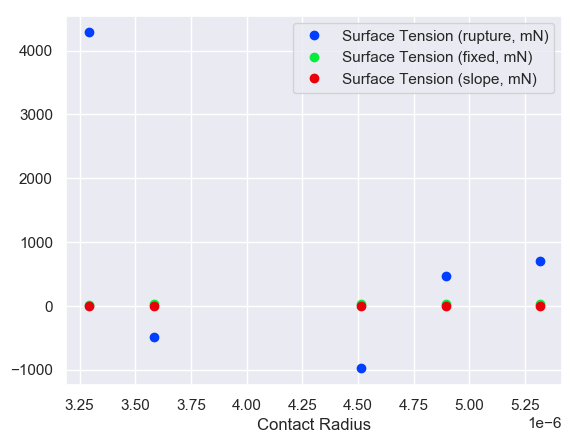

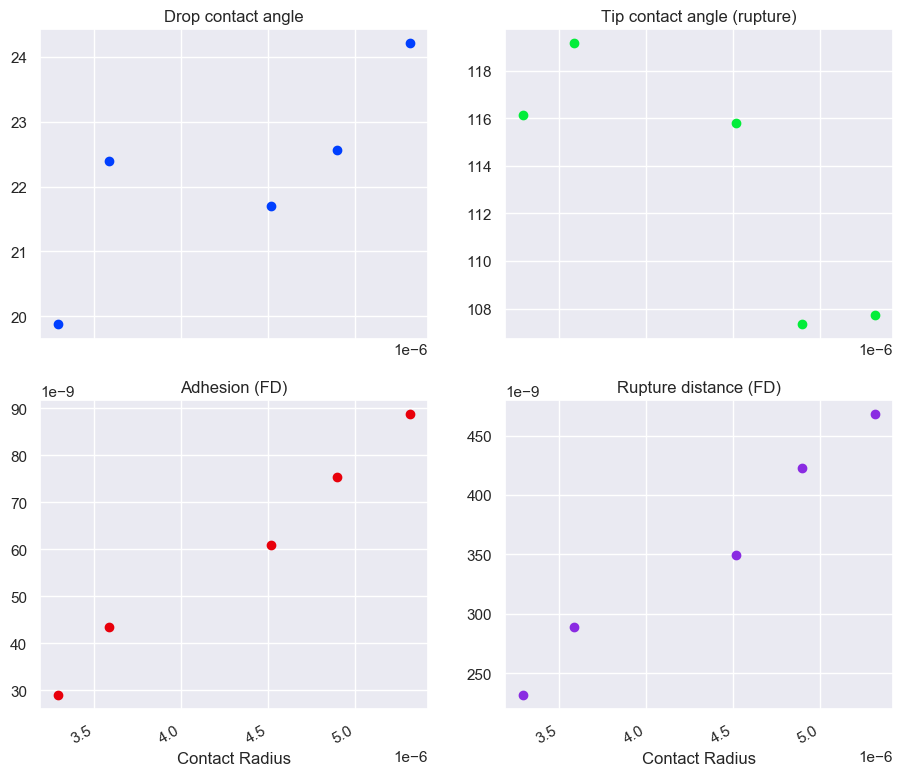

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   

         Volume    Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  \
1  3.725375e-17  3.364477e-17           22.569331         None   7.550154e-08   
2  5.132737e-17  4.774780e-17           24.204475         None   8.874271e-08   
3  1.449691e-17  1.208895e-17           22.395062         None   4.351605e-08   
4  9.902275e-18  7.206930e-18           19.875563         None   2.893249e-08   
5  2.805058e-17  2.460484e-17           21.707893         None   6.103722e-08   

   ...       R/d                                           AFM file  \
1  ...  5.011491  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...   
2  ...  4.663695  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...   
3  ...  5.051512  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...   
4  ...  5.707518  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...   
5  ...  5.215500  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...   

   Simulation R/s  Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
1        5.246771                     467.652715                   107.328260   
2        4.633466                     696.857550                   107.738622   
3        5.246771                    -491.604590                   119.145670   
4        5.915195                    4283.208270                   116.157383   
5        5.246771                    -981.434510                   115.814201   

   F_fit_actual Surface Tension (fixed, mN)  Tip contact angle (fixed)  \
1     -0.026306                   31.497163                       70.0   
2     -0.017786                   33.031824                       70.0   
3      0.019859                   24.995949                       70.0   
4     -0.001865                   19.710762                       70.0   
5      0.011435                   28.733832                       70.0   

   F_fit_fixed                                    Simulation file  
1    -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
2    -0.375231  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3    -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4    -0.405262  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5    -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[5 rows x 28 columns]

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   

         Volume    Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  \
1  3.725375e-17  3.364477e-17           22.569331         None   7.550154e-08   
2  5.132737e-17  4.774780e-17           24.204475         None   8.874271e-08   
3  1.449691e-17  1.208895e-17           22.395062         None   4.351605e-08   
4  9.902275e-18  7.206930e-18           19.875563         None   2.893249e-08   
5  2.805058e-17  2.460484e-17           21.707893         None   6.103722e-08   

   ...  FD X position  FD Y position  \
1  ...   1.907937e-05      -0.000020   
2  ...  -9.263857e-07      -0.000017   
3  ...   3.040987e-05      -0.000017   
4  ...   2.233020e-05      -0.000002   
5  ...   2.772450e-06       0.000002   

                                             FD file         s       R/d  \
1  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000002  5.011491   
2  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000002  4.663695   
3  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000002  5.051512   
4  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000001  5.707518   
5  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000002  5.215500   

                                            AFM file      yd/F  \
1  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000018   
2  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000037   
3  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000023   
4  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000018   
5  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000014   

   Surface Tension FD (mN)  Simulation contact angle  \
1                 0.001356             -31282.072023   
2                 0.002904             -31142.085238   
3                 0.001395             -27378.427247   
4                 0.000901             -23596.045739   
5                 0.001006             -34774.098905   

                                     Simulation file  
1  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
2  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[5 rows x 24 columns]

In [20]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension
#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(drop_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_path, True)

output_df_filtered = output_df[output_df['FD file'] != '']


# calculate surface tension from FD fitting
output_df2 = wetting.get_surface_tension2(drop_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_path, save=True)
output_df_filtered2 = output_df2[output_df['FD file'] != '']


ax = output_df_filtered.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df_filtered2['Contact Radius'],output_df_filtered2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_path}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df_filtered.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_path}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df_filtered)
display(output_df_filtered2)

## Combine results from different folders

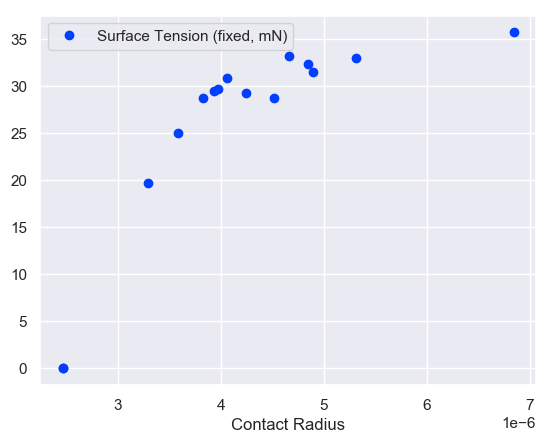

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000008        0.000004  1.021061e-06    1.023431e-06   
1      2   0.000009        0.000004  1.074508e-06    1.077356e-06   
2      3   0.000008        0.000004  1.015911e-06    1.015365e-06   
3      4   0.000008        0.000004  9.627259e-07    9.675138e-07   
0      1   0.000008        0.000004  1.021061e-06    1.023431e-06   
1      2   0.000009        0.000004  1.074508e-06    1.077356e-06   
2      3   0.000008        0.000004  1.015911e-06    1.015365e-06   
3      4   0.000008        0.000004  9.627259e-07    9.675138e-07   
0      1   0.000012        0.000007  2.229317e-06    2.231756e-06   
1      2   0.000008        0.000005  1.424188e-06    1.433289e-06   
2      3   0.000008        0.000005  1.520051e-06    1.526730e-06   
3      4   0.000007        0.000004  1.231673e-06    1.241456e-06   
0      1   0.000012        0.000007  2.229317e-06    2.231756e-06   
1      2   0.000008        0.000005  1.424188e-06    1.433289e-06   
2      3   0.000008        0.000005  1.520051e-06    1.526730e-06   
3      4   0.000007        0.000004  1.231673e-06    1.241456e-06   
0      1   0.000008        0.000002  3.947047e-07    4.014323e-07   
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   
6      7   0.000008        0.000002  3.918352e-07    3.964193e-07   
0      1   0.000008        0.000002  3.947047e-07    4.014323e-07   
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   
6      7   0.000008        0.000002  3.918352e-07    3.964193e-07   

         Volume    Volume raw  Drop contact angle  Max Adhesion  \
0  2.536093e-17  2.217834e-17           29.110347           NaN   
1  3.102204e-17  2.742845e-17           28.428051           NaN   
2  2.576628e-17  2.267945e-17           28.671446           NaN   
3  2.265756e-17  1.933068e-17           28.215104           NaN   
0  2.536093e-17  2.217834e-17           29.110347           NaN   
1  3.102204e-17  2.742845e-17           28.428051           NaN   
2  2.576628e-17  2.267945e-17           28.671446           NaN   
3  2.265756e-17  1.933068e-17           28.215104           NaN   
0  1.698734e-16  1.561849e-16           36.079489           NaN   
1  5.007016e-17  3.966157e-17           33.995807           NaN   
2  5.786234e-17  4.777917e-17           34.844440           NaN   
3  3.280749e-17  2.300836e-17           33.783088           NaN   
0  1.698734e-16  1.561849e-16           36.079489           NaN   
1  5.007016e-17  3.966157e-17           33.995807           NaN   
2  5.786234e-17  4.777917e-17           34.844440           NaN   
3  3.280749e-17  2.300836e-17           33.783088           NaN   
0  3.793078e-18  1.672164e-18           18.209539           NaN   
1  3.725375e-17  3.364477e-17           22.569331           NaN   
2  5.132737e-17  4.774780e-17           24.204475           NaN   
3  1.449691e-17  1.208895e-17           22.395062           NaN   
4  9.902275e-18  7.206930e-18           19.875563           NaN   
5  2.805058e-17  2.460484e-17           21.707893           NaN   
6  3.774934e-18  1.490840e-18           18.055830           NaN   
0  3.793078e-18  1.672164e-18           18.209539           NaN   
1  3.725375e-17  3.364477e-17           22.569331           NaN   
2  5.132737e-17  4.774780e-17           24.204475           NaN   
3  1.449691e-17  1.208895e-17           22.395062     

In [22]:
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[#'Surface Tension (rupture, mN)',
                        'Surface Tension (fixed, mN)'#,
                        #'Surface Tension FD (mN)'
                       ],
                             marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
display(fig3)
display(summary_df)

## Combine multiple FD curves

In [67]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

